In [1]:
!pip install ctgan
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: Faker
    Found existing installation: Faker 19.11.0
    Uninstalling Faker-19.11.0:
      Successfully uninstalled Faker-19.11.0


In [2]:
from ctgan import CTGAN

import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import time

start=time.time()

df = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/bank_churn.csv')

df=df.dropna()
df=df.fillna(0)
df1=df[df['Exited']==0]
df1=df1.drop(['RowNumber','CustomerId','Surname'],axis=1)
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df=df[df['Exited']==1]
#transform data into numeric value
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
df1['Geography']=le.fit_transform(df1['Geography'])
df1['Gender']=le.fit_transform(df1['Gender'])


batch_size = 5000
epochs = 100
model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(df)

n_generated_data = 5926
generated_df = model.sample(n_generated_data)

#concat original data and gan data
data_concat = pd.concat([df, generated_df])
# combine data churn and not churn
data=pd.concat([df1, data_concat])

end = time.time()
print("The time of execution of preprocess:",
      (end-start), "s")

Gen. (-1.21) | Discrim. (0.18): 100%|██████████| 100/100 [01:06<00:00,  1.51it/s]

The time of execution of preprocess: 79.28449058532715 s


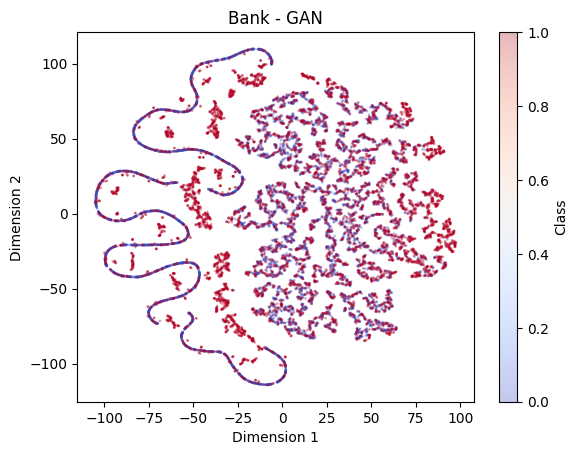

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = data.drop(['Exited'], axis=1)
labels = data['Exited']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Bank - GAN')
plt.colorbar(label='Class')
plt.show()


In [ ]:
embedded_features[0]

array([-21.510822 ,  -1.1264474], dtype=float32)

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  1 17:31:40 2020

@author: manav

Modifed on 23 AUG 2022

by mahayasa adiputra
"""

import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as mt
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

start1=time.time()

X=data.drop(['Exited'],axis=1)
y=data["Exited"]

enn = EditedNearestNeighbours(n_neighbors=3)
X, y = enn.fit_resample(X, y)
#ncr = NeighbourhoodCleaningRule(n_neighbors=5, kind_sel='all')
#X, y = ncr.fit_resample(X, y)
#tomek_links = TomekLinks()
#X, y = tomek_links.fit_resample(X, y)

#kfold cross validation
#cv = KFold(n_splits=5, random_state=1, shuffle=True)
end1 = time.time()
print("The time of execution of preprocess:",
      (end1-start1), "s")

The time of execution of preprocess: 0.15187740325927734 s


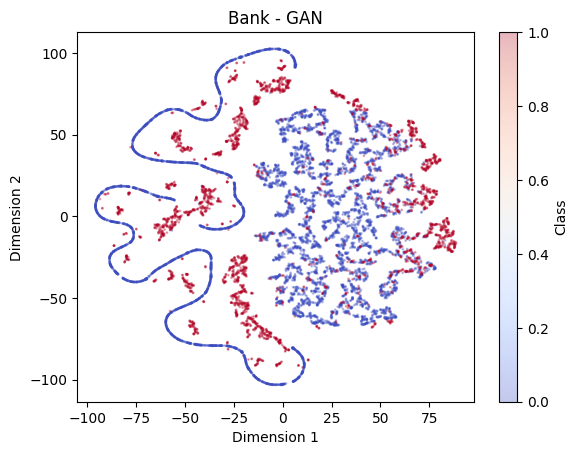

In [5]:
features = X
labels = y

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Bank - GAN')
plt.colorbar(label='Class')
plt.show()


In [ ]:
data = pd.concat([X, y], axis=1)
#fisher discriminant ratio
def fishers_discriminant_ratio(feature):
    class1_data=data[data['Exited']==0][feature]
    class2_data=data[data['Exited']==1][feature]
    mean1 = sum(class1_data) / len(class1_data)
    mean2 = sum(class2_data) / len(class2_data)

    variance1 = sum((x - mean1) ** 2 for x in class1_data) / len(class1_data)
    variance2 = sum((x - mean2) ** 2 for x in class2_data) / len(class2_data)

    between_variance = len(class1_data) * (mean1 - mean2) ** 2
    within_variance = variance1 + variance2

    discriminant_ratio = between_variance / within_variance
    return discriminant_ratio


In [ ]:
exclude_feature = 'Exited'
for feature in data.columns:
    if feature != exclude_feature:
        discriminant_ratio = fishers_discriminant_ratio(feature)
        print(f"Discriminant Ratio for {feature}: {discriminant_ratio}")

Discriminant Ratio for CreditScore: 313.3066557741539
Discriminant Ratio for Geography: 89.53463464329957
Discriminant Ratio for Gender: 48.2535086600787
Discriminant Ratio for Age: 5088.333531325418
Discriminant Ratio for Tenure: 1022.1545899563588
Discriminant Ratio for Balance: 303.76914483483915
Discriminant Ratio for NumOfProducts: 209.22761795240604
Discriminant Ratio for HasCrCard: 493.684157834809
Discriminant Ratio for IsActiveMember: 190.91164254597373
Discriminant Ratio for EstimatedSalary: 794.0570220438416


In [ ]:
startknn=time.time()
classifier=KNeighborsClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============KNN Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

endknn = time.time()
print("The time of execution of knn:",
      (endknn-startknn), "s")

===============KNN Performance====================
F1 score: 0.913
STD F1 Score: 0.002
Recall: 0.895
Specitifity: 0.818
AUC ROC: 0.928
G-Mean: 0.856
The time of execution of knn: 1.5421080589294434 s


In [ ]:
start3=time.time()

classifier = GradientBoostingClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============GBM Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end3 = time.time()
print("The time of execution of gbm:",
      (end3-start3), "s")





===============GBM Performance====================
F1 score: 0.934
STD F1 Score: 0.005
Recall: 0.960
Specitifity: 0.745
AUC ROC: 0.960
G-Mean: 0.845
The time of execution of gbm: 27.342751026153564 s


In [ ]:
startdt=time.time()
classifier=DecisionTreeClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============DT Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

enddt = time.time()
print("The time of execution of dt:",
      (enddt-startdt), "s")

===============DT Performance====================
F1 score: 0.906
STD F1 Score: 0.004
Recall: 0.902
Specitifity: 0.745
AUC ROC: 0.825
G-Mean: 0.820
The time of execution of dt: 0.9234418869018555 s


In [ ]:
start5 = time.time()
classifier=GaussianNB()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============NB Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end5 = time.time()
print("The time of execution of NB:",
      (end5-start5), "s")

===============NB Performance====================
F1 score: 0.870
STD F1 Score: 0.001
Recall: 0.870
Specitifity: 0.645
AUC ROC: 0.865
G-Mean: 0.749
The time of execution of NB: 0.3069896697998047 s


In [ ]:


start2=time.time()
#Training XGBoost
#classifier = XGBClassifier(eta=0.3, max_depth = 4, gamma=0, min_child_weight=1)
classifier = XGBClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============XGBoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))



# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()
print("The time of execution of XGBOOST:",
      (end2-start2), "s")

===============XGBoost Performance====================
F1 score: 0.937
STD F1 Score: 0.005
Recall: 0.945
Specitifity: 0.790
AUC ROC: 0.964
G-Mean: 0.864
The time of execution of XGBOOST: 25.16536235809326 s


In [ ]:
start3=time.time()

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============Random Forest Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end3 = time.time()
print("The time of execution of random forest:",
      (end3-start3), "s")

===============Random Forest Performance====================
F1 score: 0.828
STD F1 Score: 0.007
Recall: 0.802
Specitifity: 0.864
AUC ROC: 0.916
G-Mean: 0.833
The time of execution of random forest: 41.122122287750244 s


In [ ]:
start4=time.time()

from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============ADABoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end4 = time.time()
print("The time of execution of adaboost:",
      (end4-start4), "s")

===============ADABoost Performance====================
F1 score: 0.833
STD F1 Score: 0.005
Recall: 0.832
Specitifity: 0.785
AUC ROC: 0.907
G-Mean: 0.808
The time of execution of adaboost: 22.290916204452515 s
